In [2]:
import pandas as pd
import numpy as np

In [4]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [5]:
!wget $data 

--2025-10-08 10:43:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.02s   

2025-10-08 10:43:20 (48.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [14]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head(10)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412
7,150,4.0,239.0,3638.657780,17.3,2020,USA,Diesel,All-wheel drive,1.0,12.848884
8,250,1.0,174.0,2714.219310,10.3,2016,Asia,Diesel,Front-wheel drive,-1.0,16.823554
9,150,4.0,123.0,3509.036569,10.2,2005,USA,Gasoline,Front-wheel drive,-1.0,12.298355


# Preparing the dataset

In [12]:
#Select a few columns
selected_columns = ['engine_displacement' , 'horsepower','vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
selected_columns

['engine_displacement',
 'horsepower',
 'vehicle_weight',
 'model_year',
 'fuel_efficiency_mpg']

In [13]:
df_selected = df[selected_columns]

# Display the first few rows to confirm
print(df_selected.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


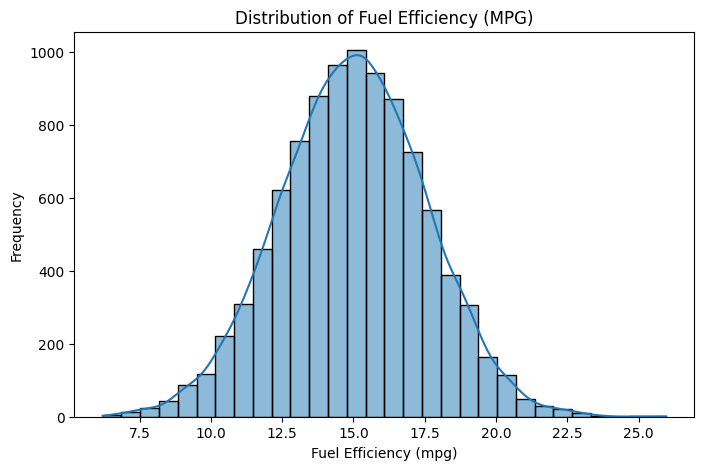

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram and density
plt.figure(figsize=(8,5))
sns.histplot(df_selected['fuel_efficiency_mpg'], bins=30, kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.show()

In [16]:
skewness = df_selected['fuel_efficiency_mpg'].skew()
print(f"Skewness: {skewness:.2f}")

Skewness: -0.01


In [17]:
#missing Value

df_selected.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [18]:
# Calculate the median (50th percentile) of horsepower
median_horsepower = df_selected['horsepower'].median()
print(f"Median horsepower: {median_horsepower}")


Median horsepower: 149.0


# Prepare and split the dataset

In [20]:
import numpy as np

# random seed for reproducibility
np.random.seed(42)

# Number of rows in the dataset
n = len(df_selected)

# Compute split sizes
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# Shuffle the indices
idx = np.arange(n)
np.random.shuffle(idx)

# Shuffle the dataframe
df_shuffled = df_selected.iloc[idx]

# Split into train, validation, and test sets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# Define the target variable
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Remove target from feature sets
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Display shape summary
print(f"Train set: {len(df_train)} rows")
print(f"Validation set: {len(df_val)} rows")
print(f"Test set: {len(df_test)} rows")


Train set: 5824 rows
Validation set: 1940 rows
Test set: 1940 rows


In [21]:
# Linear Regression Functions
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [22]:
# Feature Preparation 

base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_X(df, fill_mean=None):
    df_num = df[base].copy()
    
    # Fill missing horsepower values
    if fill_mean is None:
        # Option 1: Fill with 0
        df_num = df_num.fillna(0)
    else:
        # Option 2: Fill with mean (computed from training)
        df_num = df_num.fillna({'horsepower': fill_mean})
    
    X = df_num.values
    return X

In [23]:
# Option 1: Fill with 0 

X_train_0 = prepare_X(df_train, fill_mean=None)
w0_0, w_0 = train_linear_regression(X_train_0, y_train)

X_val_0 = prepare_X(df_val, fill_mean=None)
y_pred_0 = w0_0 + X_val_0.dot(w_0)

rmse_0 = rmse(y_val, y_pred_0)
print("RMSE (fill with 0):", round(rmse_0, 2))

RMSE (fill with 0): 0.52


In [24]:

# Option 2: Fill with mean (from train only)

horsepower_mean = df_train['horsepower'].mean()

X_train_mean = prepare_X(df_train, fill_mean=horsepower_mean)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X(df_val, fill_mean=horsepower_mean)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_mean = rmse(y_val, y_pred_mean)
print("RMSE (fill with mean):", round(rmse_mean, 2))

RMSE (fill with mean): 0.46


In [25]:
# Compare Results 

if rmse_mean < rmse_0:
    print(f"\n✅ Filling with mean gives better RMSE ({round(rmse_mean, 2)}) vs ({round(rmse_0, 2)})")
else:
    print(f"\n✅ Filling with 0 gives better RMSE ({round(rmse_0, 2)}) vs ({round(rmse_mean, 2)})")


✅ Filling with mean gives better RMSE (0.46) vs (0.52)


In [30]:

# Function to train regularized linear regression (ridge)
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])  # add regularization term
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Prepare X function (fill NAs with 0)
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# RMSE calculation
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Prepare training and validation datasets
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# Try different regularization values
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
results = {}

for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    results[r] = round(score, 2)

results




{0: np.float64(0.52),
 0.01: np.float64(0.52),
 0.1: np.float64(0.52),
 1: np.float64(0.52),
 5: np.float64(0.52),
 10: np.float64(0.52),
 100: np.float64(0.52)}

In [31]:
# best r
best_r = min(results, key=results.get)
print(f"\nBest r: {best_r} with RMSE = {results[best_r]}")



Best r: 0 with RMSE = 0.52


In [32]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X_full = np.column_stack([ones, X])
    XTX = X_full.T.dot(X_full)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X_full.T).dot(y)
    return w[0], w[1:]

def rmse(y, y_pred):
    return np.sqrt(((y_pred - y) ** 2).mean())

# features to use
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# seeds to try
seeds = list(range(10))  # [0,1,...,9]

rmse_scores = []

n_total = len(df_selected)

for seed in seeds:
    # set seed for reproducibility of shuffle
    np.random.seed(seed)
    
    # compute split sizes
    n = n_total
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    # shuffle indices and split
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df_selected.iloc[idx].reset_index(drop=True)
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val   = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test  = df_shuffled.iloc[n_train + n_val:].copy()
    
    # fill missing values with 0 (as requested)
    df_train.fillna(0, inplace=True)
    df_val.fillna(0, inplace=True)
    df_test.fillna(0, inplace=True)
    
    # prepare X matrices and targets
    X_train = df_train[base].values
    X_val   = df_val[base].values
    
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val   = df_val['fuel_efficiency_mpg'].values
    
    # train linear regression (no regularization)
    w0, w = train_linear_regression(X_train, y_train)
    
    # predict on validation set and compute RMSE
    y_pred_val = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred_val)
    
    rmse_scores.append(score)
    print(f"seed = {seed} -> RMSE (val) = {round(score, 3)}")

# compute std of the RMSE scores
std_scores = np.std(rmse_scores)
print("\nRMSE scores (unrounded):", rmse_scores)
print("Std of RMSE scores:", round(std_scores, 3))


seed = 0 -> RMSE (val) = 0.521
seed = 1 -> RMSE (val) = 0.521
seed = 2 -> RMSE (val) = 0.523
seed = 3 -> RMSE (val) = 0.516
seed = 4 -> RMSE (val) = 0.511
seed = 5 -> RMSE (val) = 0.528
seed = 6 -> RMSE (val) = 0.531
seed = 7 -> RMSE (val) = 0.509
seed = 8 -> RMSE (val) = 0.515
seed = 9 -> RMSE (val) = 0.513

RMSE scores (unrounded): [np.float64(0.5206531296292951), np.float64(0.5213388912860217), np.float64(0.5228069974785726), np.float64(0.5159516741108942), np.float64(0.5109129460108117), np.float64(0.5283406460133415), np.float64(0.5313910658151165), np.float64(0.5090670387365963), np.float64(0.5147399129426932), np.float64(0.5131865908408015)]
Std of RMSE scores: 0.007


In [34]:
#import matplotlib.pyplot as plt


#seeds = list(range(10))
#rmse_scores = [0.521, 0.521, 0.523, 0.516, 0.511, 0.528, 0.531, 0.509, 0.515, 0.513]

#plt.figure(figsize=(8, 4))
#plt.plot(seeds, rmse_scores, marker='o', linestyle='-', linewidth=1.5)
#plt.title("RMSE vs Seed (Validation Set)", fontsize=14)
#plt.xlabel("Random Seed", fontsize=12)
#plt.ylabel("RMSE", fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.6)
#plt.show()


In [35]:

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    # Add regularization term
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

def rmse(y, y_pred):
    return np.sqrt(((y_pred - y) ** 2).mean())

# seed and split sizes 
np.random.seed(9)
n = len(df_selected)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# shuffle and split
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df_selected.iloc[idx].reset_index(drop=True)

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test  = df_shuffled.iloc[n_train + n_val:].copy()

# combine train + val 
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# fill missing values with 0 
df_full_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# features and target
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

X_full_train = df_full_train[base].values
y_full_train = df_full_train['fuel_efficiency_mpg'].values

X_test = df_test[base].values
y_test = df_test['fuel_efficiency_mpg'].values

# train with regularization (r = 0.001)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# predict on test set and evaluate
y_pred_test = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_pred_test)

print("Test RMSE:", round(rmse_test, 3))


Test RMSE: 0.516
